In [78]:
import cv2
import mediapipe as mp
import pandas as pd

In [79]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [145]:
# This will be the dataframe for csv file 
data = pd.DataFrame()
data['video_id'] = 0
data['frame_count'] = 0
data['fps'] = 0
for i in range(99):
    data[i] = 0
data['actions'] = ''

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


In [146]:
# Creating dataframe with features except actions
df = pd.DataFrame()
df['video_id'] = 0
df['frame_count'] = 0
df['fps'] = 0
for i in range(99):
    df[i] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


In [60]:
annotated = pd.read_csv("/Users/bradyhong/Desktop/Datset for fitness/annotated.csv")

In [61]:
coordinates = pd.read_csv("/Users/bradyhong/Desktop/Datset for fitness/coordinates.csv", index_col = 0)
coordinates.dropna(axis=0,  inplace=True)

In [82]:
def ret_Coord(video_id, frame, landmarks):
    result = []
    result.append(int(video_id)) # video_id
    result.append(frame) # frame_count
    # fps
    result.append(coordinates.iloc[coordinates.loc[coordinates['video_id'] == videoid].index[0]].fps)
    for lndmk in landmarks:
        result.append(float(str(lndmk).split('\n')[0].split(':')[1][1:]))
        result.append(float(str(lndmk).split('\n')[1].split(':')[1][1:]))
        result.append(float(str(lndmk).split('\n')[2].split(':')[1][1:]))
    return result

In [149]:
import os
path = '/Users/bradyhong/training_video/'
files = os.listdir(path)
for video in files:
    video_path = path + str(video)
    try:
        print(int(annotated.loc[annotated['name'] == video[:-4]].video_id))
        videoid = int(annotated.loc[annotated['name'] == video[:-4]].video_id)
    except:
        continue
    cap = cv2.VideoCapture(video_path)
    count = 0
    
    # checking the frame in advance
    if int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) != len(coordinates.loc[coordinates['video_id'] == videoid].actions):
        print(videoid)
        continue
    with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("Ignoring empty camera frame.")
                break      
            count += 1
            # To improve performance, optionally mark the image as not writeable to
            # pass by reference.
            image.flags.writeable = False
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = pose.process(image)
            # this prints the x, y, z coordinates of the each joints for each frame within the visibility feature as well
            # Draw the pose annotation on the image.
            if not results.pose_landmarks:
                continue
            df.loc[len(df.index)] = ret_Coord(videoid,count,results.pose_landmarks.landmark)
    # making sure df and coordinates have same rows for distinct video_id        
    if len(df) == len(coordinates.loc[coordinates['video_id'] == videoid].actions):
        df['actions'] = list(coordinates.loc[coordinates['video_id'] == videoid].actions)
        data = pd.concat([data, df], ignore_index = True)
    df = pd.DataFrame()
    df['video_id'] = 0
    df['frame_count'] = 0
    df['fps'] = 0
    for i in range(99):
        df[i] = 0
    cap.release()


5
5
13
13
14
14
17
Ignoring empty camera frame.
      video_id  frame_count   fps         0         1         2         3  \
0         17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1         17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2         17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3         17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4         17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...        ...          ...   ...       ...       ...       ...       ...   
1795      17.0       1796.0  30.0  0.371379  0.474394 -0.251164  0.367370   
1796      17.0       1797.0  30.0  0.371250  0.474417 -0.248532  0.367211   
1797      17.0       1798.0  30.0  0.371114  0.474388 -0.247574  0.367056   
1798      17.0       1799.0  30.0  0.371103  0.474457 -0.248301  0.367041   
1799      17.0       1800.0  30.0  0.371053  0.474528 -0.246340  0.366978   

             4         5   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
33
Ignoring empty camera frame.
      video_id  frame_count   fps         0         1         2         3  \
0         17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1         17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2         17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3         17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4         17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...        ...          ...   ...       ...       ...       ...       ...   
3595      33.0       1796.0  30.0  0.612904  0.526399  0.201918  0.624941   
3596      33.0       1797.0  30.0  0.612888  0.526388  0.201593  0.624925   
3597      33.0       1798.0  30.0  0.612856  0.526377  0.199482  0.624868   
3598      33.0       1799.0  30.0  0.612591  0.526392  0.194932  0.624640   
3599      33.0       1800.0  30.0  0.611839  0.526755  0.189118  0.624033   

             4

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
40
Ignoring empty camera frame.
      video_id  frame_count   fps         0         1         2         3  \
0         17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1         17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2         17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3         17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4         17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...        ...          ...   ...       ...       ...       ...       ...   
3845      40.0        246.0  25.0  0.510148  0.135292 -0.149048  0.515076   
3846      40.0        247.0  25.0  0.510147  0.135302 -0.149046  0.515076   
3847      40.0        248.0  25.0  0.510141  0.135315 -0.148789  0.515073   
3848      40.0        249.0  25.0  0.510122  0.135336 -0.148591  0.515067   
3849      40.0        250.0  25.0  0.510113  0.135359 -0.148183  0.515064   

             4

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
44
44
49
49
54
Ignoring empty camera frame.
      video_id  frame_count   fps         0         1         2         3  \
0         17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1         17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2         17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3         17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4         17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...        ...          ...   ...       ...       ...       ...       ...   
5645      54.0       1796.0  30.0  0.151529  0.461205 -0.110564  0.141694   
5646      54.0       1797.0  30.0  0.151651  0.461328 -0.111879  0.141836   
5647      54.0       1798.0  30.0  0.151875  0.461397 -0.125034  0.142094   
5648      54.0       1799.0  30.0  0.152179  0.461573 -0.134472  0.142463   
5649      54.0       1800.0  30.0  0.152608  0.461876 -0.156934  0.142870   

  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
      video_id  frame_count   fps         0         1         2         3  \
0         17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1         17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2         17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3         17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4         17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...        ...          ...   ...       ...       ...       ...       ...   
6023      62.0        374.0  24.0  0.489183  0.500510  0.761675  0.475889   
6024      62.0        375.0  24.0  0.489234  0.502019  0.735485  0.475965   
6025      62.0        376.0  24.0  0.491782  0.503295  0.659208  0.477669   
6026      62.0        377.0  24.0  0.496715  0.504490  0.698754  0.480345   
6027      62.0        378.0  24.0  0.500605  0.505084  0.695048  0.482930   

             4         5         6  ...       

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
      video_id  frame_count   fps         0         1         2         3  \
0         17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1         17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2         17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3         17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4         17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...        ...          ...   ...       ...       ...       ...       ...   
6414      66.0        387.0  25.0  0.511842  0.273108  0.415066  0.508575   
6415      66.0        388.0  25.0  0.507349  0.273698  0.291732  0.504738   
6416      66.0        389.0  25.0  0.506466  0.275814  0.424181  0.503354   
6417      66.0        390.0  25.0  0.503572  0.278418  0.401681  0.500359   
6418      66.0        391.0  25.0  0.501516  0.295458  0.323660  0.498783   

             4         5         6  ...       

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
      video_id  frame_count   fps         0         1         2         3  \
0         17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1         17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2         17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3         17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4         17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...        ...          ...   ...       ...       ...       ...       ...   
8214      76.0       1796.0  30.0  0.505942  0.126124 -0.190516  0.509502   
8215      76.0       1797.0  30.0  0.506026  0.130248 -0.197647  0.509526   
8216      76.0       1798.0  30.0  0.506068  0.133009 -0.192245  0.509578   
8217      76.0       1799.0  30.0  0.506029  0.134382 -0.189580  0.509574   
8218      76.0       1800.0  30.0  0.505880  0.135259 -0.196496  0.509568   

             4         5         6  ...       

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
91
91
96
96
97
Ignoring empty camera frame.
      video_id  frame_count   fps         0         1         2         3  \
0         17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1         17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2         17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3         17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4         17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...        ...          ...   ...       ...       ...       ...       ...   
9203      97.0        985.0  30.0  0.514145  0.248356 -0.123928  0.507885   
9204      97.0        986.0  30.0  0.514826  0.246318 -0.124155  0.508406   
9205      97.0        987.0  30.0  0.515301  0.244019 -0.123347  0.508809   
9206      97.0        988.0  30.0  0.515490  0.240650 -0.126511  0.508995   
9207      97.0        989.0  30.0  0.515562  0.238621 -0.121584  0.509045   

  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
      video_id  frame_count   fps         0         1         2         3  \
0         17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1         17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2         17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3         17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4         17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...        ...          ...   ...       ...       ...       ...       ...   
9393     108.0        186.0  25.0  0.427167  0.399121 -0.224787  0.430613   
9394     108.0        187.0  25.0  0.427383  0.399068 -0.223523  0.430824   
9395     108.0        188.0  25.0  0.427518  0.398991 -0.224205  0.430966   
9396     108.0        189.0  25.0  0.427640  0.398959 -0.248668  0.431066   
9397     108.0        190.0  25.0  0.427747  0.398928 -0.252141  0.431092   

             4         5         6  ...       

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
112
112
114
114
115
115
116
116
117
117
120
120
124
124
130
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
11193     130.0       1796.0  30.0  0.358455  0.524720 -0.209015  0.351695   
11194     130.0       1797.0  30.0  0.358353  0.524675 -0.211693  0.351573   
11195     130.0       1798.0  30.0  0.358224  0.524569 -0.220144  0.351433   
11196     130.0       1799.0  30.0  0.357970  0.524260 -0.222893  0.351225   
11197     130.0       18

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
11813     150.0        616.0  25.0  0.378199  0.171907 -0.414403  0.404044   
11814     150.0        617.0  25.0  0.371757  0.166458 -0.432008  0.398248   
11815     150.0        618.0  25.0  0.367642  0.160637 -0.430932  0.394998   
11816     150.0        619.0  25.0  0.363255  0.154194 -0.476158  0.390473   
11817     150.0        620.0  25.0  0.357695  0.148817 -0.579640  0.385245   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
152
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
13613     152.0       1796.0  30.0  0.633712  0.651020  0.088868  0.644631   
13614     152.0       1797.0  30.0  0.633702  0.650922  0.100405  0.644636   
13615     152.0       1798.0  30.0  0.633972  0.650655  0.099902  0.644814   
13616     152.0       1799.0  30.0  0.634084  0.650634  0.094537  0.644848   
13617     152.0       1800.0  30.0  0.634435  0.649927  0.088964  0.645019   

 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
177
Ignoring empty camera frame.
181
181
183
183
195
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
15413     195.0       1796.0  30.0  0.464280  0.483297 -0.034770  0.446994   
15414     195.0       1797.0  30.0  0.465178  0.483322 -0.027324  0.447545   
15415     195.0       1798.0  30.0  0.465731  0.483358 -0.023999  0.447945   
15416     195.0       1799.0  30.0  0.466053  0.483329 -0.035215  0.448284   
15417     195.0       1800.0  3

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
17213     217.0       1796.0  30.0  0.340329  0.245423 -0.159279  0.328635   
17214     217.0       1797.0  30.0  0.340411  0.247164 -0.155754  0.328651   
17215     217.0       1798.0  30.0  0.341099  0.248986 -0.151951  0.328951   
17216     217.0       1799.0  30.0  0.341077  0.253384 -0.145897  0.328879   
17217     217.0       1800.0  30.0  0.340974  0.255478 -0.153986  0.328860   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
19013     237.0       1796.0  30.0  0.464924  0.282178 -0.270649  0.472679   
19014     237.0       1797.0  30.0  0.462586  0.301849 -0.289148  0.470340   
19015     237.0       1798.0  30.0  0.460304  0.321705 -0.302383  0.467870   
19016     237.0       1799.0  30.0  0.460750  0.325618 -0.341305  0.468223   
19017     237.0       1800.0  30.0  0.460240  0.336794 -0.333646  0.467825   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
246
246
251
251
252
252
264
264
269
269
271
Ignoring empty camera frame.
274
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
20813     274.0       1796.0  30.0  0.633657  0.449857 -0.236154  0.643566   
20814     274.0       1797.0  30.0  0.632648  0.448663 -0.242041  0.642438   
20815     274.0       1798.0  30.0  0.632180  0.447895 -0.243186  0.641950   
20816     274.0       1799.0  30.0  0.631366  0.445406 -0.245757  0.641072   
20817  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
283
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
22801     283.0       1984.0  45.0  0.475636  0.323544 -0.466364  0.485618   
22802     283.0       1985.0  45.0  0.474970  0.323659 -0.468376  0.485021   
22803     283.0       1986.0  45.0  0.474834  0.323007 -0.439616  0.484857   
22804     283.0       1987.0  45.0  0.474736  0.322108 -0.433510  0.484769   
22805     283.0       1988.0  45.0  0.474585  0.321168 -0.433716  0.484668   

 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
285
Ignoring empty camera frame.
290
290
295
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
24601     295.0       1796.0  30.0  0.557306  0.144890 -0.124350  0.561614   
24602     295.0       1797.0  30.0  0.557482  0.146275 -0.129466  0.562024   
24603     295.0       1798.0  30.0  0.557568  0.147032 -0.132824  0.562352   
24604     295.0       1799.0  30.0  0.558780  0.146838 -0.165101  0.563462   
24605     295.0       1800.0  30.0  0.5

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
1120
Ignoring empty camera frame.
305
305
307
Ignoring empty camera frame.
311
311
312
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
26401     312.0       1796.0  30.0  0.799100  0.734240  0.065768  0.823779   
26402     312.0       1797.0  30.0  0.799022  0.739026  0.030274  0.823874   
26403     312.0       1798.0  30.0  0.799802  0.741726  0.030665  0.824496   
26404     312.0       1799.0  30.0  0.802540  0.742135  0.051801  0.826679 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
325
Ignoring empty camera frame.
330
330
331
331
332
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
28201     332.0       1796.0  30.0  0.687873  0.664852  0.029456  0.698475   
28202     332.0       1797.0  30.0  0.687795  0.665056  0.025667  0.698188   
28203     332.0       1798.0  30.0  0.685730  0.665032  0.027617  0.696140   
28204     332.0       1799.0  30.0  0.682157  0.665156  0.034758  0.693172   
28205     332.0       1800.0  3

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
30189     334.0       1984.0  45.0  0.475636  0.323544 -0.466364  0.485618   
30190     334.0       1985.0  45.0  0.474970  0.323659 -0.468376  0.485021   
30191     334.0       1986.0  45.0  0.474834  0.323007 -0.439616  0.484857   
30192     334.0       1987.0  45.0  0.474736  0.322108 -0.433510  0.484769   
30193     334.0       1988.0  45.0  0.474585  0.321168 -0.433716  0.484668   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
31989     335.0       1796.0  30.0  0.695472  0.532255 -0.257476  0.706258   
31990     335.0       1797.0  30.0  0.695332  0.531257 -0.257295  0.705972   
31991     335.0       1798.0  30.0  0.694482  0.530962 -0.260524  0.705208   
31992     335.0       1799.0  30.0  0.693789  0.530994 -0.271799  0.704343   
31993     335.0       1800.0  30.0  0.694010  0.530263 -0.291169  0.704352   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
340
340
341
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
32538     341.0        545.0  25.0  0.478091  0.171319 -0.073451  0.485024   
32539     341.0        546.0  25.0  0.478236  0.170680 -0.074072  0.485322   
32540     341.0        547.0  25.0  0.478325  0.170790 -0.081891  0.485477   
32541     341.0        548.0  25.0  0.478367  0.173494 -0.084114  0.485439   
32542     341.0        549.0  25.0  0.478398  0.175715 -0.088325  0.4855

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
346
346
348
Ignoring empty camera frame.
350
350
351
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
34338     351.0       1796.0  30.0  0.263379  0.507558 -0.284817  0.256943   
34339     351.0       1797.0  30.0  0.263431  0.513225 -0.275635  0.256971   
34340     351.0       1798.0  30.0  0.263451  0.519534 -0.237672  0.257026   
34341     351.0       1799.0  30.0  0.264029  0.522330 -0.255158  0.257840   
34342     351.0       1800.0  3

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
1121
Ignoring empty camera frame.
1122
1122
377
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
34930     377.0        588.0  25.0  0.549201  0.162045 -0.183594  0.550216   
34931     377.0        589.0  25.0  0.547426  0.162245 -0.212176  0.549091   
34932     377.0        590.0  25.0  0.547523  0.163082 -0.216215  0.549449   
34933     377.0        591.0  25.0  0.546457  0.162847 -0.215085  0.548507   
34934     377.0        592.0  25.0  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
36730     380.0       1796.0  30.0  0.437210  0.226655 -0.545951  0.450320   
36731     380.0       1797.0  30.0  0.437872  0.225631 -0.602055  0.451411   
36732     380.0       1798.0  30.0  0.438558  0.225490 -0.610863  0.452469   
36733     380.0       1799.0  30.0  0.439656  0.225618 -0.614552  0.454609   
36734     380.0       1800.0  30.0  0.441034  0.225485 -0.615701  0.457168   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
38530     390.0       1796.0  30.0  0.468361  0.170665 -0.155332  0.473423   
38531     390.0       1797.0  30.0  0.468024  0.169945 -0.150390  0.473079   
38532     390.0       1798.0  30.0  0.467363  0.168238 -0.141545  0.472624   
38533     390.0       1799.0  30.0  0.465925  0.165843 -0.129795  0.471610   
38534     390.0       1800.0  30.0  0.464831  0.162261 -0.118560  0.470894   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
393
Ignoring empty camera frame.
394
394
395
395
399
Ignoring empty camera frame.
400
Ignoring empty camera frame.
401
Ignoring empty camera frame.
404
404
405
405
406
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
38974     406.0        440.0  25.0  0.425347  0.407899 -0.484150  0.445936   
38975     406.0        441.0  25.0  0.426974  0.407038 -0.480734  0.447307   
38976     406.0        442.0  25.0  0.428516  0.406960 -0.477082  0.4486

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
408
408
409
Ignoring empty camera frame.
412
Ignoring empty camera frame.
414
Ignoring empty camera frame.
419
419
421
421
424
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
40774     424.0       1796.0  30.0  0.734212  0.616717  0.084157  0.745714   
40775     424.0       1797.0  30.0  0.734225  0.616566  0.084024  0.745715   
40776     424.0       1798.0  30.0  0.734317  0.616165  0.082455  0.745778   
40777     424.0       1799.0  30.0 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
440
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
41267     440.0        489.0  25.0  0.499132  0.759492 -0.025119  0.485922   
41268     440.0        490.0  25.0  0.499696  0.763345 -0.025474  0.486299   
41269     440.0        491.0  25.0  0.500867  0.765383 -0.025315  0.487056   
41270     440.0        492.0  25.0  0.501229  0.767462 -0.025420  0.487240   
41271     440.0        493.0  25.0  0.502458  0.768125 -0.024977  0.488265   

 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
43067     447.0       1796.0  30.0  0.629092  0.703718  0.049620  0.638098   
43068     447.0       1797.0  30.0  0.629002  0.703731  0.048042  0.638013   
43069     447.0       1798.0  30.0  0.628998  0.703662  0.048715  0.638009   
43070     447.0       1799.0  30.0  0.629106  0.703526  0.045883  0.638085   
43071     447.0       1800.0  30.0  0.629122  0.703118  0.050763  0.638105   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
44867     457.0       1796.0  30.0  0.316435  0.586470 -0.074685  0.295336   
44868     457.0       1797.0  30.0  0.318440  0.587628 -0.071498  0.297496   
44869     457.0       1798.0  30.0  0.325548  0.588771 -0.067279  0.303578   
44870     457.0       1799.0  30.0  0.330848  0.587897 -0.058039  0.308696   
44871     457.0       1800.0  30.0  0.334162  0.585329 -0.043828  0.311230   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
460
Ignoring empty camera frame.
461
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
46667     461.0       1796.0  30.0  0.499477  0.276927 -0.299069  0.510994   
46668     461.0       1797.0  30.0  0.499909  0.274143 -0.297143  0.511754   
46669     461.0       1798.0  30.0  0.500537  0.269328 -0.298978  0.512911   
46670     461.0       1799.0  30.0  0.501661  0.263363 -0.307291  0.514645   
46671     461.0       1800.0  30.0  0.503133  0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
469
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
48467     469.0       1796.0  30.0  0.624117  0.312930 -0.022464  0.635015   
48468     469.0       1797.0  30.0  0.624228  0.312302 -0.022241  0.634969   
48469     469.0       1798.0  30.0  0.624909  0.310325 -0.065529  0.635842   
48470     469.0       1799.0  30.0  0.625367  0.309226 -0.070537  0.636426   
48471     469.0       1800.0  30.0  0.625211  0.309055 -0.072281  0.636239   

 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
48755     470.0        284.0  24.0  0.514060  0.136231  0.094880  0.510020   
48756     470.0        285.0  24.0  0.509592  0.134554  0.060512  0.507076   
48757     470.0        286.0  24.0  0.507280  0.131057 -0.162199  0.506337   
48758     470.0        287.0  24.0  0.506171  0.129475 -0.147311  0.505757   
48759     470.0        288.0  24.0  0.502173  0.129342  0.062224  0.500328   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
475
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
50555     475.0       1796.0  30.0  0.346564  0.265352 -0.224933  0.350948   
50556     475.0       1797.0  30.0  0.346454  0.265328 -0.219442  0.351695   
50557     475.0       1798.0  30.0  0.338264  0.264270 -0.230472  0.343167   
50558     475.0       1799.0  30.0  0.327023  0.254158 -0.207046  0.331968   
50559     475.0       1800.0  30.0  0.316920  0.245930 -0.255648  0.321374   

 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
480
480
486
486
489
Ignoring empty camera frame.
1125
Ignoring empty camera frame.
495
495
497
497
508
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
50795     508.0        236.0  23.0  0.742335  0.222853 -0.878415  0.764823   
50796     508.0        237.0  23.0  0.731684  0.222715 -0.829971  0.754942   
50797     508.0        238.0  23.0  0.725792  0.222603 -0.860832  0.748989   
50798     508.0        239.0  23.0  0.716639  0.223217 -0.9

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
52595     517.0       1796.0  30.0  0.413706  0.442146 -0.205864  0.411918   
52596     517.0       1797.0  30.0  0.412251  0.446739 -0.205672  0.411122   
52597     517.0       1798.0  30.0  0.412544  0.450218 -0.241811  0.411162   
52598     517.0       1799.0  30.0  0.412588  0.452277 -0.263616  0.411200   
52599     517.0       1800.0  30.0  0.412664  0.454280 -0.269741  0.411239   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
527
Ignoring empty camera frame.
531
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
54395     531.0       1796.0  30.0  0.430595  0.160107 -0.225884  0.433046   
54396     531.0       1797.0  30.0  0.438595  0.160710 -0.239126  0.440558   
54397     531.0       1798.0  30.0  0.445487  0.164905 -0.259346  0.447561   
54398     531.0       1799.0  30.0  0.451003  0.171102 -0.257574  0.453402   
54399     531.0       1800.0  30.0  0.456408  0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
54939     533.0        540.0  25.0  0.514349  0.145595 -0.137337  0.515486   
54940     533.0        541.0  25.0  0.514532  0.146330 -0.142126  0.515615   
54941     533.0        542.0  25.0  0.514647  0.147441 -0.143873  0.515643   
54942     533.0        543.0  25.0  0.514747  0.149777 -0.158614  0.515713   
54943     533.0        544.0  25.0  0.514820  0.153116 -0.158273  0.515751   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
56739     534.0       1796.0  30.0  0.483455  0.212508 -0.284906  0.489551   
56740     534.0       1797.0  30.0  0.483244  0.212159 -0.285820  0.489480   
56741     534.0       1798.0  30.0  0.482796  0.211330 -0.286748  0.489279   
56742     534.0       1799.0  30.0  0.482480  0.210999 -0.287241  0.489120   
56743     534.0       1800.0  30.0  0.482356  0.213373 -0.290293  0.489082   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
57111     539.0        368.0  25.0  0.304813  0.465908 -0.009639  0.301644   
57112     539.0        369.0  25.0  0.304812  0.465752 -0.008664  0.301638   
57113     539.0        370.0  25.0  0.304810  0.465686 -0.008013  0.301634   
57114     539.0        371.0  25.0  0.304809  0.465561 -0.007375  0.301629   
57115     539.0        372.0  25.0  0.304807  0.465516 -0.006419  0.301621   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
544
544
545
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
58911     545.0       1796.0  30.0  0.380788  0.408268 -0.116091  0.370079   
58912     545.0       1797.0  30.0  0.381646  0.408025 -0.057193  0.371733   
58913     545.0       1798.0  30.0  0.383013  0.407891 -0.044391  0.373959   
58914     545.0       1799.0  30.0  0.386139  0.407894 -0.026652  0.377114   
58915     545.0       1800.0  30.0  0.387481  0.408176 -0.021608  0.3787

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
548
Ignoring empty camera frame.
557
557
562
Ignoring empty camera frame.
563
563
565
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
60711     565.0       1796.0  30.0  0.540239  0.196314 -0.156735  0.545124   
60712     565.0       1797.0  30.0  0.541044  0.196778 -0.155978  0.545991   
60713     565.0       1798.0  30.0  0.542426  0.198478 -0.155916  0.547257   
60714     565.0       1799.0  30.0  0.543962  0.200072 -0.149703  0.548729  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


569
573
573
576
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
60999     576.0        284.0  24.0  0.550166  0.194240 -0.122134  0.547779   
61000     576.0        285.0  24.0  0.556321  0.189230  0.028402  0.553633   
61001     576.0        286.0  24.0  0.551360  0.169478  0.114485  0.549302   
61002     576.0        287.0  24.0  0.542850  0.147655 -0.123344  0.544461   
61003     576.0        288.0  24.0  0.525544  0.135872  0.237654  0.522870   

              4   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
62799     588.0       1796.0  30.0  0.462249  0.243527 -0.094256  0.465704   
62800     588.0       1797.0  30.0  0.468519  0.282496 -0.100021  0.471529   
62801     588.0       1798.0  30.0  0.474295  0.317218 -0.103273  0.477282   
62802     588.0       1799.0  30.0  0.479503  0.358024 -0.182342  0.482459   
62803     588.0       1800.0  30.0  0.485918  0.385863 -0.225558  0.489675   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
594
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
64599     594.0       1796.0  30.0  0.966559  0.299101  0.070328  0.990265   
64600     594.0       1797.0  30.0  0.963902  0.299109  0.083191  0.987737   
64601     594.0       1798.0  30.0  0.942203  0.302638  0.111764  0.960104   
64602     594.0       1799.0  30.0  0.947378  0.304079  0.108532  0.965836   
64603     594.0       1800.0  30.0  0.951801  0.304167  0.108308  0.971668   

 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
610
Ignoring empty camera frame.
611
Ignoring empty camera frame.
616
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
66359     616.0       1756.0  29.0  0.350218  0.380584 -0.185942  0.350329   
66360     616.0       1757.0  29.0  0.349415  0.380565 -0.183564  0.349627   
66361     616.0       1758.0  29.0  0.348432  0.380576 -0.189349  0.348823   
66362     616.0       1759.0  29.0  0.347433  0.380563 -0.191911  0.348022   
66363     616.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
68159     619.0       1796.0  30.0  0.307579  0.625682  0.047630  0.298278   
68160     619.0       1797.0  30.0  0.307384  0.625634  0.048067  0.298134   
68161     619.0       1798.0  30.0  0.307285  0.625609  0.047827  0.298060   
68162     619.0       1799.0  30.0  0.307290  0.625498  0.046243  0.298059   
68163     619.0       1800.0  30.0  0.307312  0.625386  0.045167  0.298068   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
69959     626.0       1796.0  30.0  0.602471  0.543084 -0.415490  0.603060   
69960     626.0       1797.0  30.0  0.602557  0.542204 -0.415254  0.603078   
69961     626.0       1798.0  30.0  0.602619  0.541400 -0.419286  0.603089   
69962     626.0       1799.0  30.0  0.602661  0.540930 -0.419335  0.603091   
69963     626.0       1800.0  30.0  0.602716  0.540755 -0.409028  0.603116   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
641
641
642
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
71759     642.0       1796.0  30.0  0.236064  0.451317 -0.124385  0.226041   
71760     642.0       1797.0  30.0  0.227796  0.451719 -0.090577  0.217226   
71761     642.0       1798.0  30.0  0.219640  0.452489 -0.066175  0.209042   
71762     642.0       1799.0  30.0  0.217305  0.452934 -0.068635  0.206730   
71763     642.0       1800.0  30.0  0.212225  0.453343 -0.068726  0.2005

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


651
1127
Ignoring empty camera frame.
654
654
655
655
1128
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
73519    1128.0       1756.0  29.0  0.426961  0.363503 -0.295974  0.428194   
73520    1128.0       1757.0  29.0  0.426467  0.363782 -0.297060  0.427540   
73521    1128.0       1758.0  29.0  0.425772  0.364068 -0.286578  0.426891   
73522    1128.0       1759.0  29.0  0.425248  0.365172 -0.287183  0.426318   
73523    1128.0       1760.0  29.0  0.423660  0.365711

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
662
662
663
663
664
Ignoring empty camera frame.
665
Ignoring empty camera frame.
667
Ignoring empty camera frame.
674
Ignoring empty camera frame.
686
Ignoring empty camera frame.
687
687
692
692
698
Ignoring empty camera frame.
702
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
75319     702.0       1796.0  30.0  0.515782  0.473915 -0.627418  0.518932   
75320     702.0       1797.0  30.0  0.515112  0.473137 -0.623531  0.518329   
75321 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
715
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
77119     715.0       1796.0  30.0  0.353801  0.584513 -0.384475  0.349967   
77120     715.0       1797.0  30.0  0.354258  0.584366 -0.397871  0.350427   
77121     715.0       1798.0  30.0  0.354552  0.584250 -0.400436  0.350690   
77122     715.0       1799.0  30.0  0.354744  0.584188 -0.402556  0.350850   
77123     715.0       1800.0  30.0  0.354881  0.583171 -0.414169  0.350989   

 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
719
Ignoring empty camera frame.
723
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
77737     723.0        614.0  25.0  0.494320  0.208581 -0.206920  0.497514   
77738     723.0        615.0  25.0  0.494220  0.208179 -0.205462  0.497486   
77739     723.0        616.0  25.0  0.494212  0.207976 -0.202218  0.497494   
77740     723.0        617.0  25.0  0.494225  0.207905 -0.200792  0.497586   
77741     723.0        618.0  25.0  0.494264  0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
1131
1131
736
736
737
737
739
739
740
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
79537     740.0       1796.0  30.0  0.511686  0.098784 -0.249154  0.516792   
79538     740.0       1797.0  30.0  0.511805  0.099060 -0.240742  0.517224   
79539     740.0       1798.0  30.0  0.513194  0.099098 -0.236812  0.518463   
79540     740.0       1799.0  30.0  0.514559  0.098362 -0.239054  0.519610   
79541     740.0       1800.0  30.0  0.515738  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
744
744
745
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
81337     745.0       1796.0  30.0  0.477445  0.286812 -0.204237  0.489298   
81338     745.0       1797.0  30.0  0.476968  0.238425 -0.227526  0.488777   
81339     745.0       1798.0  30.0  0.476471  0.221660 -0.236309  0.488618   
81340     745.0       1799.0  30.0  0.476415  0.215160 -0.248743  0.489349   
81341     745.0       1800.0  30.0  0.473447  0.199957 -0.252597  0.4863

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
750
750
753
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
83137     753.0       1796.0  30.0  0.544349  0.457001 -0.455794  0.547390   
83138     753.0       1797.0  30.0  0.544156  0.457075 -0.453788  0.547095   
83139     753.0       1798.0  30.0  0.543966  0.457553 -0.454060  0.547005   
83140     753.0       1799.0  30.0  0.543763  0.457804 -0.452904  0.546914   
83141     753.0       1800.0  30.0  0.543679  0.458907 -0.451770  0.5469

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
84937     759.0       1796.0  30.0  0.685706  0.580402 -0.231034  0.696102   
84938     759.0       1797.0  30.0  0.685793  0.580732 -0.227593  0.696165   
84939     759.0       1798.0  30.0  0.685796  0.581460 -0.219894  0.696172   
84940     759.0       1799.0  30.0  0.685494  0.581963 -0.215506  0.696000   
84941     759.0       1800.0  30.0  0.685161  0.582166 -0.215779  0.695837   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
768
Ignoring empty camera frame.
775
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
86737     775.0       1796.0  30.0  0.302197  0.492583 -0.030387  0.278118   
86738     775.0       1797.0  30.0  0.299108  0.494609 -0.032480  0.275317   
86739     775.0       1798.0  30.0  0.294615  0.497775 -0.045514  0.271387   
86740     775.0       1799.0  30.0  0.292140  0.493152 -0.055428  0.253068   
86741     775.0       1800.0  30.0  0.261552  0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
88725     776.0       1984.0  45.0  0.475636  0.323544 -0.466364  0.485618   
88726     776.0       1985.0  45.0  0.474970  0.323659 -0.468376  0.485021   
88727     776.0       1986.0  45.0  0.474834  0.323007 -0.439616  0.484857   
88728     776.0       1987.0  45.0  0.474736  0.322108 -0.433510  0.484769   
88729     776.0       1988.0  45.0  0.474585  0.321168 -0.433716  0.484668   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
88933     780.0        204.0  24.0  0.381162  0.205909 -0.110826  0.378897   
88934     780.0        205.0  24.0  0.381481  0.201605 -0.121581  0.379030   
88935     780.0        206.0  24.0  0.381683  0.200910 -0.119124  0.379058   
88936     780.0        207.0  24.0  0.382572  0.203183 -0.123135  0.379261   
88937     780.0        208.0  24.0  0.382692  0.205783 -0.156269  0.379300   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
90733     782.0       1796.0  30.0  0.536479  0.476961 -0.600844  0.539716   
90734     782.0       1797.0  30.0  0.536578  0.476782 -0.598463  0.539827   
90735     782.0       1798.0  30.0  0.536686  0.476701 -0.596439  0.539876   
90736     782.0       1799.0  30.0  0.536876  0.476276 -0.584238  0.540054   
90737     782.0       1800.0  30.0  0.536968  0.476197 -0.582538  0.540183   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
92533     790.0       1796.0  30.0  0.443165  0.481696 -0.472554  0.444205   
92534     790.0       1797.0  30.0  0.443327  0.482255 -0.473531  0.444241   
92535     790.0       1798.0  30.0  0.443352  0.482692 -0.471154  0.444271   
92536     790.0       1799.0  30.0  0.443123  0.483279 -0.467088  0.443833   
92537     790.0       1800.0  30.0  0.442518  0.484105 -0.463985  0.442897   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
794
Ignoring empty camera frame.
796
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
93121     796.0        584.0  25.0  0.463338  0.156779 -0.150522  0.464379   
93122     796.0        585.0  25.0  0.463289  0.156867 -0.150343  0.464342   
93123     796.0        586.0  25.0  0.463085  0.157148 -0.165426  0.464314   
93124     796.0        587.0  25.0  0.462859  0.157437 -0.173883  0.464300   
93125     796.0        588.0  25.0  0.462734  0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
806
806
1132
Ignoring empty camera frame.
807
807
1133
Ignoring empty camera frame.
814
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
94921     814.0       1796.0  30.0  0.482515  0.345318 -0.456213  0.487375   
94922     814.0       1797.0  30.0  0.484377  0.345704 -0.455282  0.489760   
94923     814.0       1798.0  30.0  0.486468  0.345849 -0.413610  0.492193   
94924     814.0       1799.0  30.0  0.488925  0.346316 -0.388699  0.494406

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


817
825
Ignoring empty camera frame.
827
827
830
Ignoring empty camera frame.
839
Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
96721     839.0       1796.0  30.0  0.636102  0.538417 -0.474401  0.638269   
96722     839.0       1797.0  30.0  0.636109  0.539309 -0.465838  0.638254   
96723     839.0       1798.0  30.0  0.637503  0.539627 -0.449710  0.639109   
96724     839.0       1799.0  30.0  0.638563  0.539921 -0.442678  0.639874   
96725     839.0       1800.0  3

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
98521     842.0       1796.0  30.0  0.674694  0.416674 -0.257241  0.685898   
98522     842.0       1797.0  30.0  0.674773  0.416654 -0.257364  0.686029   
98523     842.0       1798.0  30.0  0.674747  0.417002 -0.256683  0.686028   
98524     842.0       1799.0  30.0  0.674729  0.417373 -0.257592  0.686077   
98525     842.0       1800.0  30.0  0.674723  0.418946 -0.258977  0.686227   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
       video_id  frame_count   fps         0         1         2         3  \
0          17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1          17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2          17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3          17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4          17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...         ...          ...   ...       ...       ...       ...       ...   
99094     846.0        569.0  25.0  0.487048  0.124388 -0.233249  0.494408   
99095     846.0        570.0  25.0  0.487328  0.124303 -0.230397  0.494667   
99096     846.0        571.0  25.0  0.487673  0.123729 -0.227083  0.494993   
99097     846.0        572.0  25.0  0.488090  0.123121 -0.212262  0.495355   
99098     846.0        573.0  25.0  0.488764  0.122974 -0.202807  0.495724   

              4         5         

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
865
865
866
866
868
868
869
Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
100894     869.0       1796.0  30.0  0.577016  0.189274 -0.103043  0.582153   
100895     869.0       1797.0  30.0  0.577271  0.189748 -0.102198  0.582422   
100896     869.0       1798.0  30.0  0.578358  0.190552 -0.115186  0.583069   
100897     869.0       1799.0  30.0  0.579303  0.191063 -0.114917  0.583531   
100898     869.0       1800.0  30.0  0.579607

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
101666     877.0        768.0  25.0  0.553659  0.246739 -0.773357  0.570877   
101667     877.0        769.0  25.0  0.554220  0.246233 -0.758551  0.571572   
101668     877.0        770.0  25.0  0.554983  0.245766 -0.869282  0.572388   
101669     877.0        771.0  25.0  0.555943  0.245460 -0.914685  0.573324   
101670     877.0        772.0  25.0  0.556674  0.245332 -0.868937  0.574044   

               4      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
892
892
894
894
895
895
899
899
907
907
909
909
1135
Ignoring empty camera frame.
915
915
1136
1136
921
Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
102035     921.0        365.0  25.0  0.528083  0.164761  0.041348  0.522134   
102036     921.0        366.0  25.0  0.528062  0.166765  0.043544  0.522185   
102037     921.0        367.0  25.0  0.528110  0.168039  0.043723  0.522553   
102038     921.0        368.0  25.0  0.528125  0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
102285     926.0        246.0  25.0  0.498105  0.230900 -0.363351  0.502919   
102286     926.0        247.0  25.0  0.497879  0.231951 -0.364432  0.502554   
102287     926.0        248.0  25.0  0.497575  0.233944 -0.351956  0.502312   
102288     926.0        249.0  25.0  0.497355  0.236275 -0.383328  0.502141   
102289     926.0        250.0  25.0  0.496999  0.237478 -0.393334  0.501867   

               4      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
102684     934.0        395.0  25.0  0.548934  0.135985 -0.190068  0.544890   
102685     934.0        396.0  25.0  0.549128  0.135958 -0.190767  0.545247   
102686     934.0        397.0  25.0  0.549257  0.135875 -0.187192  0.545544   
102687     934.0        398.0  25.0  0.549472  0.135847 -0.190783  0.545857   
102688     934.0        399.0  25.0  0.549724  0.135833 -0.191060  0.546108   

               4      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
104484     961.0       1796.0  30.0  0.495953  0.397890 -0.343870  0.501171   
104485     961.0       1797.0  30.0  0.495324  0.392283 -0.345939  0.500948   
104486     961.0       1798.0  30.0  0.494362  0.394233 -0.334268  0.500166   
104487     961.0       1799.0  30.0  0.494318  0.417806 -0.419581  0.499478   
104488     961.0       1800.0  30.0  0.490588  0.449606 -0.380367  0.494932   

               4      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


969
975
975
1137
Ignoring empty camera frame.
1138
1138
989
989
997
997
1000
1000
1004
1004
1006
1006
1011
Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
106284    1011.0       1796.0  30.0  0.365646  0.490662 -0.387681  0.363541   
106285    1011.0       1797.0  30.0  0.368031  0.490264 -0.388544  0.365731   
106286    1011.0       1798.0  30.0  0.368592  0.487094 -0.394740  0.366214   
106287    1011.0       1799.0  30.0  0.370223  0.487398 -0.407794  0.36795

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
108084    1021.0       1796.0  30.0  0.455933  0.151499 -0.204142  0.462557   
108085    1021.0       1797.0  30.0  0.457200  0.160847 -0.214194  0.464004   
108086    1021.0       1798.0  30.0  0.457873  0.167922 -0.215495  0.464705   
108087    1021.0       1799.0  30.0  0.458332  0.171565 -0.216800  0.465172   
108088    1021.0       1800.0  30.0  0.459997  0.173334 -0.245458  0.466813   

               4      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


1029
1038
1038
1139
Ignoring empty camera frame.
1140
Ignoring empty camera frame.
1052
Ignoring empty camera frame.
1064
1064
1065
1065
1066
1066
1068
Ignoring empty camera frame.
1071
Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
109884    1071.0       1796.0  30.0  0.566163  0.280002 -0.409732  0.573373   
109885    1071.0       1797.0  30.0  0.564374  0.278447 -0.395050  0.571734   
109886    1071.0       1798.0  30.0  0.564201  0.278587 -0.393165  0.57164

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
111684    1089.0       1796.0  30.0  0.601369  0.541727  0.070448  0.610654   
111685    1089.0       1797.0  30.0  0.601568  0.542197  0.077292  0.610847   
111686    1089.0       1798.0  30.0  0.601828  0.542508  0.080260  0.611073   
111687    1089.0       1799.0  30.0  0.602188  0.544078  0.085540  0.611519   
111688    1089.0       1800.0  30.0  0.602479  0.544902  0.086836  0.611858   

               4      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Ignoring empty camera frame.
        video_id  frame_count   fps         0         1         2         3  \
0           17.0          1.0  30.0  0.469707  0.482329 -0.002357  0.448683   
1           17.0          2.0  30.0  0.469834  0.482433 -0.009200  0.449051   
2           17.0          3.0  30.0  0.469793  0.482422 -0.034634  0.449083   
3           17.0          4.0  30.0  0.469157  0.482434 -0.059984  0.448887   
4           17.0          5.0  30.0  0.468733  0.482558 -0.057667  0.448780   
...          ...          ...   ...       ...       ...       ...       ...   
113484    1093.0       1796.0  30.0  0.543352  0.017731 -0.107510  0.559971   
113485    1093.0       1797.0  30.0  0.543862  0.020051 -0.099013  0.560208   
113486    1093.0       1798.0  30.0  0.544616  0.021082 -0.046101  0.560863   
113487    1093.0       1799.0  30.0  0.543749  0.025784 -0.090839  0.560298   
113488    1093.0       1800.0  30.0  0.541734  0.024757 -0.108123  0.558251   

               4      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


1095
1097
1097
1099
1099
1101
1101
1104
1104
1109
1109
1111
Ignoring empty camera frame.
1141
1141


In [150]:
# writing csv file
data.to_csv("mediapipe_coord.csv")

In [172]:
# reading csv file
data = pd.read_csv("mediapipe_coord.csv", index_col = 0)
data.dropna(axis=0,  inplace=True)

In [ ]:
data.video_id

In [154]:
doubt = ['idle','bench_press','triceps','torso_up_double_leg_extension'
,'bear_hold_knee_taps','bear_hold_shoulder_taps','transition','glutes','pulse_ups_right','pulse_ups_left','straight_left_leg_pulse',
'push_hip_up_right_leg_up','hip_up_right_swing_down','push_hip_up_left_leg_up','hip_up_left_swing_down','knees_to_chest','bear_hold',
'front_press','front_up_pulse','front_laying_leg_lifts','front_laying_arms_legs_lifts','high_plank_left_leg_press','strech','stretching',
'fullbody_walkouts','down_dog','up_dog','runners_lundge_reach','table_top','all_fours','reverse_dog_crunch','knees_to_elbow',
'all_fours_drive','pace_skips','criss_cross','donkey_press','table_top_position_idle','upper_body_up_double_leg_extension','adjusting','pointing']

idle_standing = ['walking','standing','standing,talking','talking,walking','talking','standing_idle','standing_writing'
                ,'walking_idle']

idle_sitting = ['sitting','sitting_idle']

idle_lyingdown = ['laying_flat','laying_down_idle','laydown_faceup','laying_down_face_up','front_laying_position'
                ,'laying_down_flat','laydown_face_up','laydown_flat','front_laying_idle']

workout_standing = ['jump_rope','jumping_jacks','dancing','pullups','jumping','hanging','high_knees',
                    'agility_feet','x_jumps','run_in_place','standing_skips',
                    'running','wall_pushups','boxing','high_knee_sprint','high_knee_sprints']

workout_transition =['bodyweight_squats','lateral_lunges','lunges','squats','body_weight_squats','skii_hops',
                    'body_weight_squat_toes','squat_jumps','lateral_squad_jumps','lateral_squat_jumps','drop_squats','surfer_hops',
                    'lateral_squat_walk_reverse_lundge','burpy_crawl_combo','squat_hold_reverse_lundge','burpy',
                     'split_hop','lower_knee_hop','lateral_squat_walk_reverse_lundge','lateral_shuffle','shuffle_position']

workout_lyingdown = ['pushups','crunches','plank_dynamic','plank_static','side_plank_dynamic','mountain_climbers',
                    'plank','fire_hydrants','roll_up','alternating_deadbug','single_bent_leg_lower','double_bent_leg_lower',
                    'double_leg_extension', 'upper_body_up_criss_cross','bear_hold_taps','bear_crawl','forward_plank',
                    'left_side_plank','right_side_plank','arm_plank','modified_arm_plank','left_side_plank_reaching',
                     'right_side_plank_reaching','kickbacks_right_glute','hamstring_curl_right','straight_right_leg_pulse',
                    'kickbacks_left_glute','hip_bridge','cross_crunches','forearm_plank','high_plank','high_plank_right_leg_press',
                    'push_hip_up_right_leg','push_hip_up_left_leg','up_down_dog','mountain_climber','cat_cow','all_fours_elbow_spine_stretch',
                     'lay_down_knees_up','lay_down_one_knee_up','lay_down_knee_up_down','lay_down_knee_swing_shoulder_blades_up','forearm_plank_rocking',
                     'loaded_beast_push_up','modified_push_ups','hamstring_curl_left','high_plank_shoulder_feet_combo','straight_leg_lifts','all_fours_warm_up',
                    'all_fours_idle','kneeling_idle']

workout_yoga_strectching = ['yoga,stretching','streching','yoga,','yoga,ground','yoga,all_four','yoga,standing']

remove = ['slides', 'off_screen', 'slide', 'pointing', 'offscreen','intro_page']

In [155]:
def change_actions(x):
    if x in idle_standing:
        return 'Idle_High'
    elif x in idle_sitting:
        return 'idle_sitting'
    elif x in idle_lyingdown:
        return 'Idle_Low'
    elif x in workout_standing:
        return 'Workout_High'
    elif x in workout_transition:
        return 'Workout_Transition'
    elif x in workout_lyingdown:
        return 'Workout_Low'
    elif x in workout_yoga_strectching:
        return 'yoga/strectching'
    elif x in remove:
        return 'remove'
    elif x in doubt:
        return "doubt"
    else:
        return x
    

In [156]:
req = annotated.iloc[:,3:].values.tolist()
flatten = [items for lists in req for items in lists]
flatten = [x for x in flatten if str(x) != 'nan']
count_dict={}
for action in flatten:
    if action in count_dict:
        count_dict[action]+=1
    else:
        count_dict[action]=1

count =pd.DataFrame.from_dict(count_dict,orient = 'index')
count.reset_index(inplace=True)
count = count.rename(columns = {'index':'actions'})

count['six_class' ]= count['actions'].apply(lambda x: change_actions(x))

In [157]:
count.groupby(['six_class'])[0].sum()

six_class
Idle_High             5268
Idle_Low                94
Workout_High          3066
Workout_Low           4071
Workout_Transition    1862
doubt                 1777
idle_sitting           226
remove                 654
yoga/strectching      1715
Name: 0, dtype: int64

In [158]:
data['target']= data['actions'].apply(lambda x: change_actions(x))
data.drop(['actions'] , axis = 1,inplace = True)
data.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


,video_id,frame_count,fps,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,target
0,17.0,1.0,30.0,0.469707,0.482329,-0.002357,0.448683,0.460598,-0.030509,0.448470,...,0.932732,0.651811,0.257009,1.013107,0.818778,0.107989,0.981854,0.772962,0.278996,Workout_Low
1,17.0,2.0,30.0,0.469834,0.482433,-0.009200,0.449051,0.460630,-0.038493,0.448717,...,0.932262,0.651182,0.264400,1.015914,0.821414,0.108853,0.981819,0.773844,0.300499,Workout_Low
2,17.0,3.0,30.0,0.469793,0.482422,-0.034634,0.449083,0.460595,-0.064239,0.448725,...,0.918206,0.653155,0.285164,1.015106,0.821940,0.116092,0.976226,0.775637,0.331376,Workout_Low
3,17.0,4.0,30.0,0.469157,0.482434,-0.059984,0.448887,0.460432,-0.090335,0.448505,...,0.908120,0.655573,0.289354,1.015628,0.822087,0.115743,0.970726,0.778361,0.335143,Workout_Low
4,17.0,5.0,30.0,0.468733,0.482558,-0.057667,0.448780,0.460469,-0.089963,0.448384,...,0.898029,0.657241,0.301708,1.007267,0.820174,0.125473,0.961302,0.778066,0.350331,Workout_Low


In [168]:
# Moment
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats

# Function to return the diffrence in coordinate of xth frame and x+nth frame
def data_transform(data, n, step, test =False):
    
    if test == False:
        segments = []
        labels = []
        video_id = []
        for id in data['video_id'].unique():
            sub_set = data[data["video_id"] == id]
            for i in range(0, sub_set.shape[0] - n, step):

                values = ((sub_set.iloc[i+n, 3:102] - sub_set.iloc[i, 3:102]) / sub_set.iloc[i+n, 3:37])

                label = stats.mode(sub_set['target'][i: i+n])[0][0]

                #video_id.append(id)
                segments.append([values.append(sub_set.iloc[i+n, 3:102])])
                labels.append(label)
        
                

        reshaped_segments = np.asarray(segments, dtype = np.float32).reshape(-n,198)
        #video_id = np.asarray(video_id)
        df = pd.DataFrame(reshaped_segments)
        #df.insert(0, "video_id", video_id)
        df['target'] = labels  
        
        return(df)
    
        

    else:
        segments = []
        data = pd.DataFrame(points)
      
        for i in range(0, data.shape[0] - n, step):

            values = ((data.iloc[i+n, :] - data.iloc[i, :]) / data.iloc[i+n, :])
            segments.append([values.append(data.iloc[i+n, :])])
    
                

        reshaped_segments = np.asarray(segments, dtype = np.float32).reshape(-n,198)

        
        return(reshaped_segments)
  
# XG Boost Classifier

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score


def model_xgb(X_train, y_train, X_test, y_test, cf_matrix = False):
    
    # Create a classifier
    xgb = XGBClassifier(objective='multi:softproba', random_state =42 )

    # Fit the classifier with the training data
    xgb.fit(X_train,y_train)

    # Use trained model to predict output of test dataset
    predictions  = xgb.predict(X_test) 
    preds_probs = xgb.predict_proba(X_test)
    
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    f1 = f1_score(y_test, predictions, average='macro')
    precision = precision_score(y_test, predictions,average = 'micro', pos_label=1)
    recall = recall_score(y_test, predictions,average = 'micro', pos_label=1)
   
    print("ACCURACY PER INSTANCE:" ,accuracy)
    print("F1_score:" ,f1)
    print("Precision:", precision)
    print("Recall:",recall)
    
    (unique,count) = np.unique(y_train, return_counts=True)
    
    class_labels = unique


    # plotting confusion matrix
    
    if cf_matrix == True:

        plt.figure(figsize = (16,6))
        sns.heatmap(pd.DataFrame(confusion_matrix(y_test , predictions)),annot=True, fmt="d",
                    xticklabels = class_labels, yticklabels = class_labels)

        plt.xlabel('Predictions', fontsize=18)
        plt.ylabel('Actuals', fontsize=18)
        plt.title('Confusion Matrix', fontsize=18)
        print(classification_report(y_test, predictions))
        plt.show()

    return (xgb, predictions, preds_probs, accuracy, f1, precision, recall )



In [169]:
data.groupby("target").size()

target
Idle_High             18664
Idle_Low                360
Workout_High           3874
Workout_Low           48642
Workout_Transition    11970
doubt                 17700
idle_sitting           4256
yoga/strectching       8023
dtype: int64

In [170]:
from sklearn.model_selection import train_test_split

data_transformed = data_transform(data, 5,5)

remove_from_target = ['doubt', 'remove','yoga/strectching','idle_sitting']

data_transformed = data_transformed[~data_transformed['target'].isin(remove_from_target)]

print(data_transformed.groupby("target").size())


X = data_transformed.iloc[:,:-1]
y =data_transformed['target']



from sklearn.preprocessing import LabelEncoder
# changing the target value to numeric value to fit the data
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, shuffle  = True)

target
Idle_High             3711
Idle_Low                71
Workout_High           771
Workout_Low           9703
Workout_Transition    2387
dtype: int64


ACCURACY PER INSTANCE: 0.9879836577745734
F1_score: 0.9345255224840286
Precision: 0.9879836577745734
Recall: 0.9879836577745734
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       928
           1       0.92      0.65      0.76        17
           2       0.95      0.95      0.95       193
           3       0.99      1.00      0.99      2426
           4       0.98      0.99      0.98       597

    accuracy                           0.99      4161
   macro avg       0.97      0.91      0.93      4161
weighted avg       0.99      0.99      0.99      4161



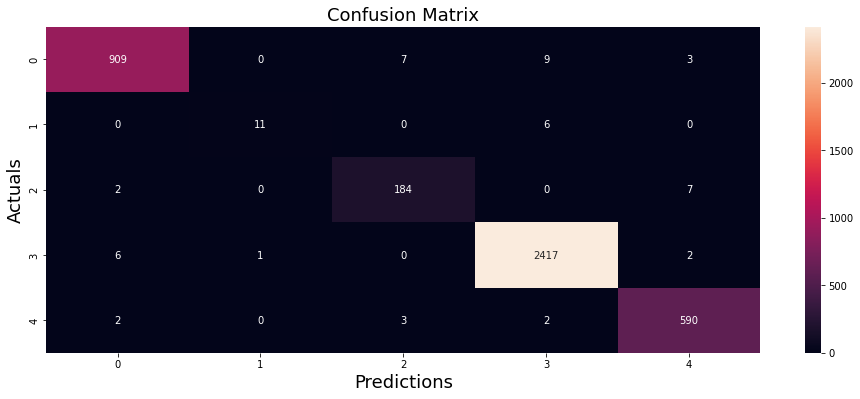

In [171]:

model, predictions , preds_probs, accuracy, f1, precision, recall = model_xgb(X_train, y_train, X_test, y_test, cf_matrix =True)

0 -> Idle_High, 1 -> Idle_Low, 2 -> Workout_High, 3 -> Workout_Low, 4 -> Workout_Transition 